# Face Recognition and Identification

Steps : Recognition
    1. Grayscale 
    2. Haar cascade classifier
    3. Region of Interest
    
Steps : Identification
    4. Training data
    5. Training the LBPH Face Recognizer 
    6. Using the recognizer

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import pickle

%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]

In [2]:
plt.rcParams['figure.figsize'] = [20, 10]

# 1. Loading a face

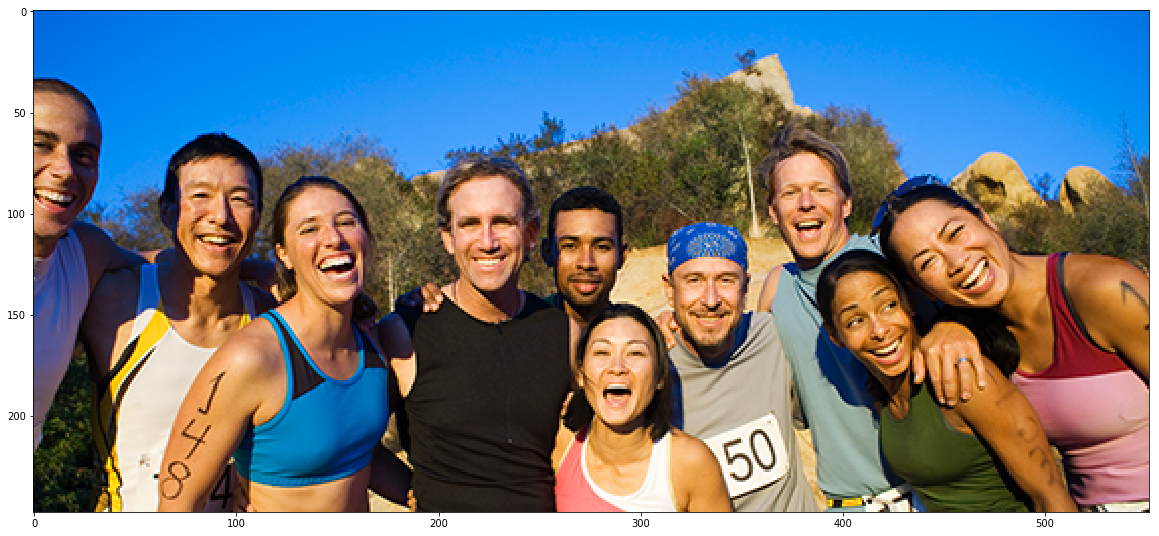

In [3]:
image = cv2.imread("face/people.jpg")
frame = image.copy()
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
plt.imshow(frame[...,::-1])

# 2. Loading Haar cascade classifier

In [4]:
face_cascade = cv2.CascadeClassifier('data/haarcascade_frontalface_alt2.xml')
eye_cascade = cv2.CascadeClassifier('data/haarcascade_eye.xml')
smile_cascade = cv2.CascadeClassifier('data/haarcascade_smile.xml')

In [5]:
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.5, minNeighbors=3)
faces

array([[360,  72,  45,  45],
       [ 70,  74,  45,  45],
       [201,  88,  45,  45],
       [251,  98,  45,  45],
       [313, 116,  45,  45],
       [266, 153,  45,  45]], dtype=int32)

# 3. Region of Interest

In [6]:
x, y, w, h = faces[1]
roi_gray = gray[y:y+h, x:x+w]
roi_color = frame[y:y+h, x:x+w]

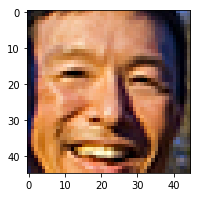

In [7]:
plt.figure(figsize=(3,3))
plt.imshow(roi_color[...,::-1])

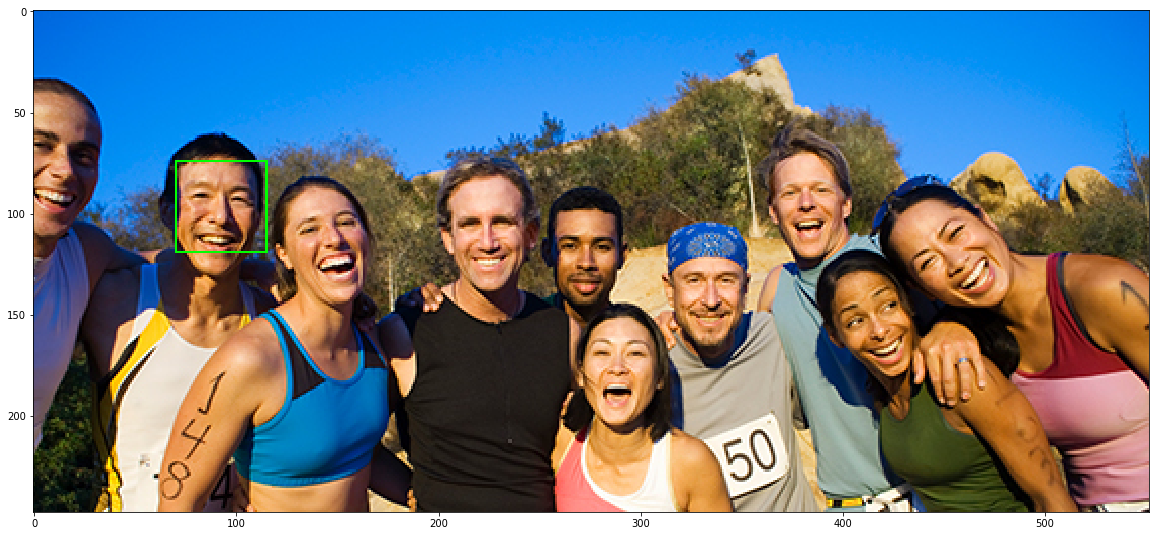

In [8]:
color = (0, 255, 0)
stroke = 1
end_cord_x = x + w
end_cord_y = y + h
cv2.rectangle(frame, (x, y), (end_cord_x, end_cord_y), color, stroke)

plt.imshow(frame[...,::-1])

# 4. Training data

In [21]:
image_dir = os.path.join("images_training")

In [22]:
y_labels = []
x_train = []

current_id = 0
label_ids = {}

for root, dirs, files in os.walk(image_dir):
    for file in files:
        if file.endswith("png") or file.endswith("jpg"):
            
            path = os.path.join(root, file)
            image_face_gray = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2GRAY)
            image_resized = cv2.resize(image_face_gray, (550, 550)) 
            faces = face_cascade.detectMultiScale(image_resized, scaleFactor=1.5, minNeighbors=3)
            
            label = os.path.basename(root).replace(" ", "-").lower()
            if not label in label_ids:
                label_ids[label] = current_id
                current_id += 1
            id_ = label_ids[label]

            for (x,y,w,h) in faces:
                roi = image_resized[y:y+h, x:x+w]
                x_train.append(roi)
                y_labels.append(id_)

In [23]:
with open("database/face-labels.pickle", 'wb') as f:
    pickle.dump(label_ids, f)

# 5. Training the LBPH Face Recognizer 

In [24]:
recognizer = cv2.face.LBPHFaceRecognizer_create()
recognizer.train(x_train, np.array(y_labels))
recognizer.save("recognizers/face-trainner.yml")

# 6. Using the recognizer

In [61]:
recognizer = cv2.face.LBPHFaceRecognizer_create()
recognizer.read("./recognizers/face-trainner.yml")

labels = {"person_name": 1}
with open("database/face-labels.pickle", 'rb') as f:
    og_labels = pickle.load(f)
    labels = {v:k for k,v in og_labels.items()}

cap = cv2.VideoCapture('video/got.mp4')

#while(True):
    # Capture frame-by-frame
frame = cv2.imread("images_training/emilia-clarke/1.jpg")
gray  = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.5, minNeighbors=5)
for (x, y, w, h) in faces:
    roi_gray = gray[y:y+h, x:x+w] #(ycord_start, ycord_end)
    roi_color = frame[y:y+h, x:x+w]

    id_, conf = recognizer.predict(roi_gray)

    name = labels[id_]
    print (conf)
    cv2.putText(frame, name, (x,y-10), cv2.FONT_HERSHEY_SIMPLEX, 1,  (0, 0, 0), 4)

    cv2.rectangle(frame, (x, y), (x + w,  y + h), (255, 0, 0), 5)
    
    #cv2.imshow('frame',frame)
    
    #if cv2.waitKey(20) & 0xFF == ord('q'):
        #cap.release()
        #cv2.destroyAllWindows()
        #break
#cap.release()
#cv2.destroyAllWindows()

43.53420127486829


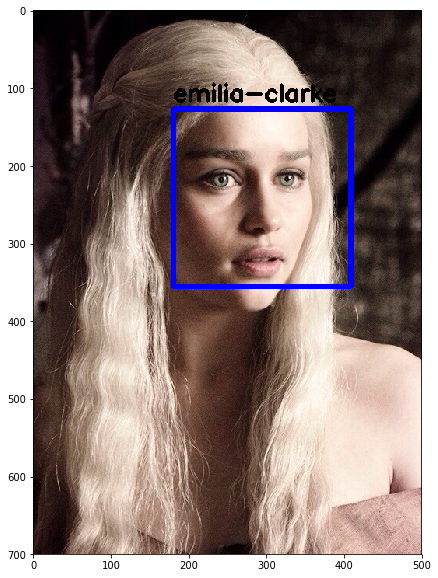

In [62]:
plt.imshow(frame[...,::-1])